In [1]:
# To stop the warning of leak in k-means clustering #

import os
os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
#Importing all Modules #

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, confusion_matrix, ConfusionMatrixDisplay

In [19]:
# Loading the Dataset #
Disease_data = 'C:/Users/tarun/Downloads/Diseases_Symptoms.csv' 

df = pd.read_csv(Disease_data)

# To create the 'First Letter' column #
df['First Letter'] = df['Name'].str[0]

df['Symptoms Length'] = df['Symptoms'].dropna().apply(len)

df.head()

,Code,Name,Symptoms,Treatments,First Letter,Symptoms Length
0,1,Panic disorder,"Palpitations, Sweating, Trembling, Shortness o...","Antidepressant medications, Cognitive Behavior...",P,89
1,2,Vocal cord polyp,"Hoarseness, Vocal Changes, Vocal Fatigue","Voice Rest, Speech Therapy, Surgical Removal",V,40
2,3,Turner syndrome,"Short stature, Gonadal dysgenesis, Webbed neck...","Growth hormone therapy, Estrogen replacement t...",T,58
3,4,Cryptorchidism,"Absence or undescended testicle(s), empty scro...",Observation and monitoring (in cases of mild o...,C,173
4,5,Ethylene glycol poisoning-1,"Nausea, vomiting, abdominal pain, General mala...","Supportive Measures, Gastric Decontamination, ...",E,97


In [20]:
# To describe the dataset #

df.describe()

,Code,Symptoms Length
count,400.000000,400.000000
mean,200.500000,85.605000
std,115.614301,58.913504
min,1.000000,18.000000
25%,100.750000,48.000000
50%,200.500000,67.000000
75%,300.250000,103.000000
max,400.000000,374.000000


In [5]:
# Bar Plot #

def Bar_Plot(df):
    plt.figure(figsize=(14, 10))
    sns.countplot(data=df, x='First Letter', order=sorted(df['First Letter'].unique()), palette='viridis')
    plt.title('Frequency of Diseases by First Letter', fontsize=24, weight='bold')
    plt.xlabel('First Letter', fontsize=24, weight='bold')
    plt.ylabel('Count', fontsize=24, weight='bold')
    plt.xticks(fontsize=16, weight='bold')
    plt.yticks(fontsize=16, weight='bold')
    plt.tight_layout()
    plt.savefig('disease_bar_chart.png')  # Save the plot as a PNG image
    plt.show()  # Display the plot on screen

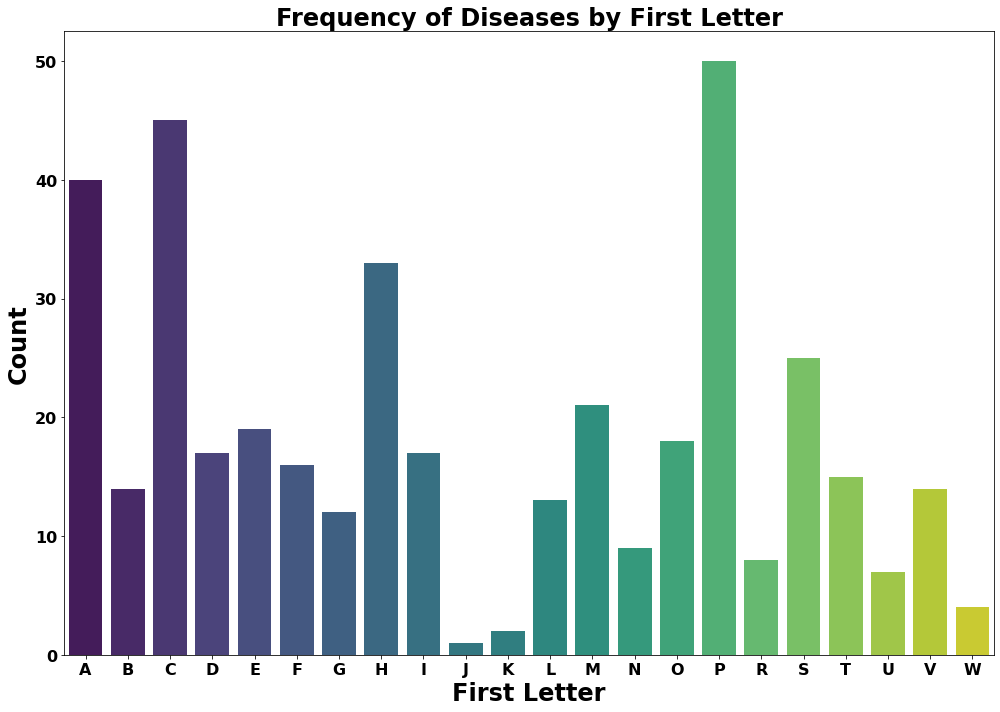

In [6]:
# Call the function with the DataFrame
def main():
    Bar_Plot(df)

if __name__ == "__main__":
        main()

In [7]:
#Scatter Plot #

def Scatter_Plot(df):
    """
    Creates a scatter plot showing relationships between code and the length of symptoms.
    """
    plt.figure(figsize=(14, 10))
    sns.scatterplot(data=df, x='Code', y='Symptoms Length', hue='First Letter', palette='viridis', s=150)
    plt.title('Code vs Symptoms Length', fontsize=24, weight='bold')
    plt.xlabel('Code', fontsize=20, weight='bold')
    plt.ylabel('Symptoms Length', fontsize=20, weight='bold')
    plt.xticks(fontsize=16, weight='bold')
    plt.yticks(fontsize=16, weight='bold')
    plt.legend(title='First Letter', fontsize=10, title_fontsize=18)
    plt.tight_layout()
    plt.savefig('scatter_plot.png')
    plt.show()

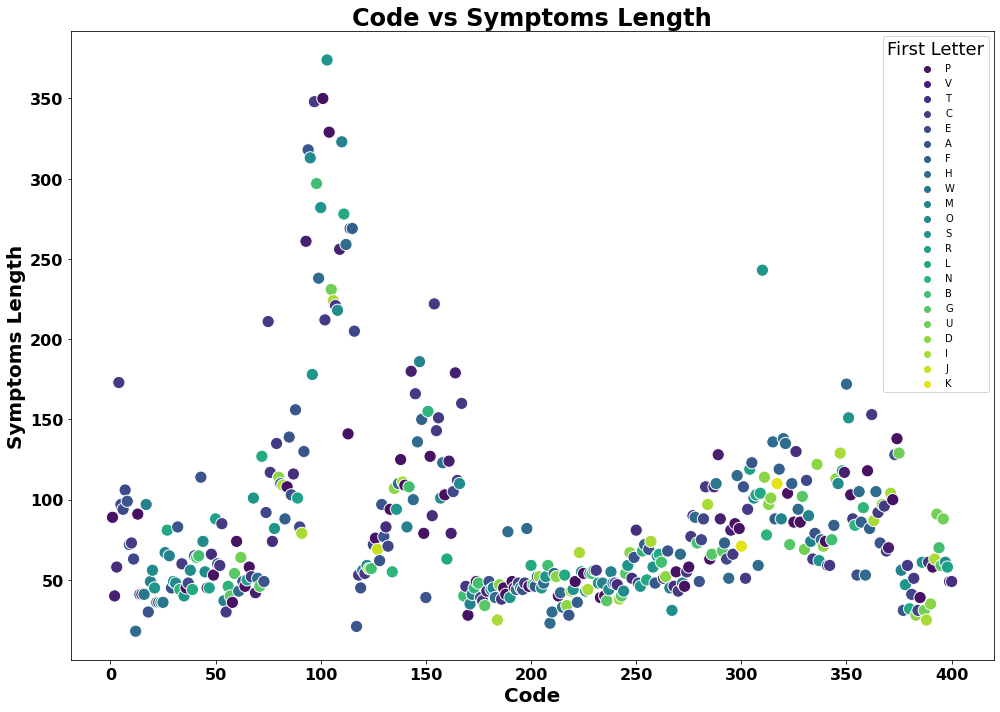

In [8]:
def main():
    Scatter_Plot(df)

if __name__ == "__main__":
        main()

In [9]:
# HeatMap Plot #

def HeatMap_Plot(df):
    numeric_cols = df.select_dtypes(include='number')
    corr_matrix = numeric_cols.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis', annot_kws={'size': 18}, cbar_kws={'shrink': 1.0})
    plt.title('Feature Correlation Heatmap', fontsize=24, weight='bold')
    plt.xticks(fontsize=20, weight='bold')
    plt.yticks(fontsize=20, weight='bold', rotation=0)
    plt.tight_layout()
    plt.savefig('heatmap.png')
    plt.show()

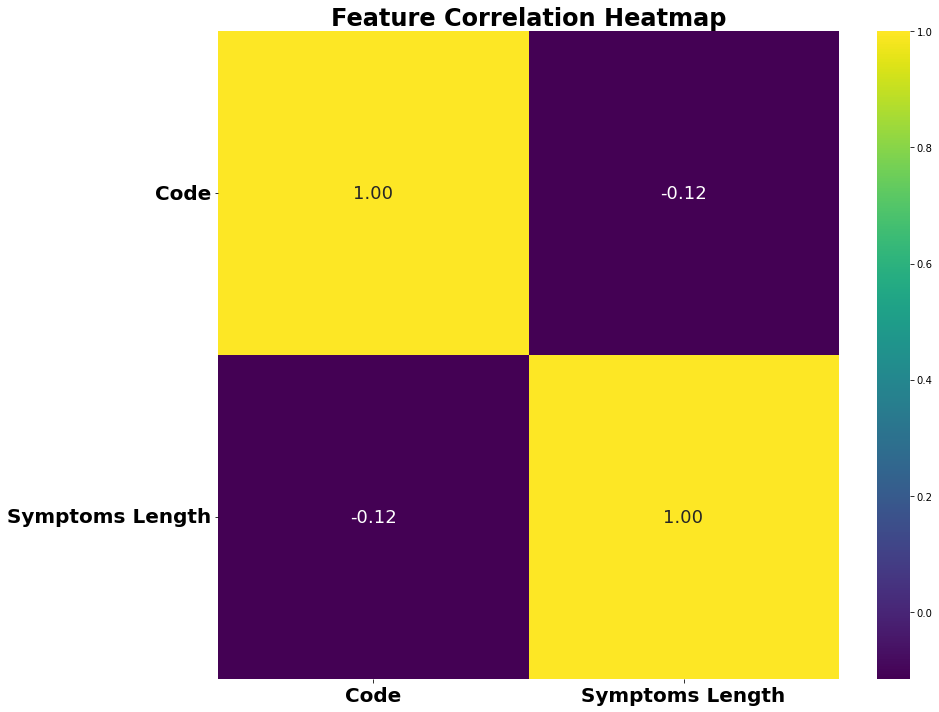

In [10]:
def main():
    HeatMap_Plot(df)

if __name__ == "__main__":
        main()

In [11]:
# K-Means Clustering #

def Visualisation_Of_Clustering_KMeans(df):
    numeric_cols = df.select_dtypes(include='number')
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(numeric_cols)
    
    # Elbow method #
    
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data_scaled)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(14, 10))
    plt.plot(K, distortions, marker='o', linestyle='--', color='b')
    plt.title('Elbow Method for Optimal Clusters', fontsize=24, weight='bold')
    plt.xlabel('Number of Clusters', fontsize=20, weight='bold')
    plt.ylabel('Inertia', fontsize=20, weight='bold')
    plt.xticks(fontsize=16, weight='bold')
    plt.yticks(fontsize=16, weight='bold')
    plt.grid()
    plt.tight_layout()
    plt.savefig('elbow_plot.png')
    plt.show()
    
    # Clustering Visualization #
    
    optimal_k = 3
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    df['Cluster'] = clusters
    
    plt.figure(figsize=(14, 10))
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='viridis', s=150)
    plt.title('K-Means Clustering', fontsize=24, weight='bold')
    plt.xlabel('Feature 1', fontsize=24, weight='bold')
    plt.ylabel('Feature 2', fontsize=24, weight='bold')
    plt.xticks(fontsize=18, weight='bold')
    plt.yticks(fontsize=18, weight='bold')
    plt.legend(title='Cluster', fontsize=16, title_fontsize=18)
    plt.tight_layout()
    plt.savefig('kmeans_clusters.png')
    plt.show()

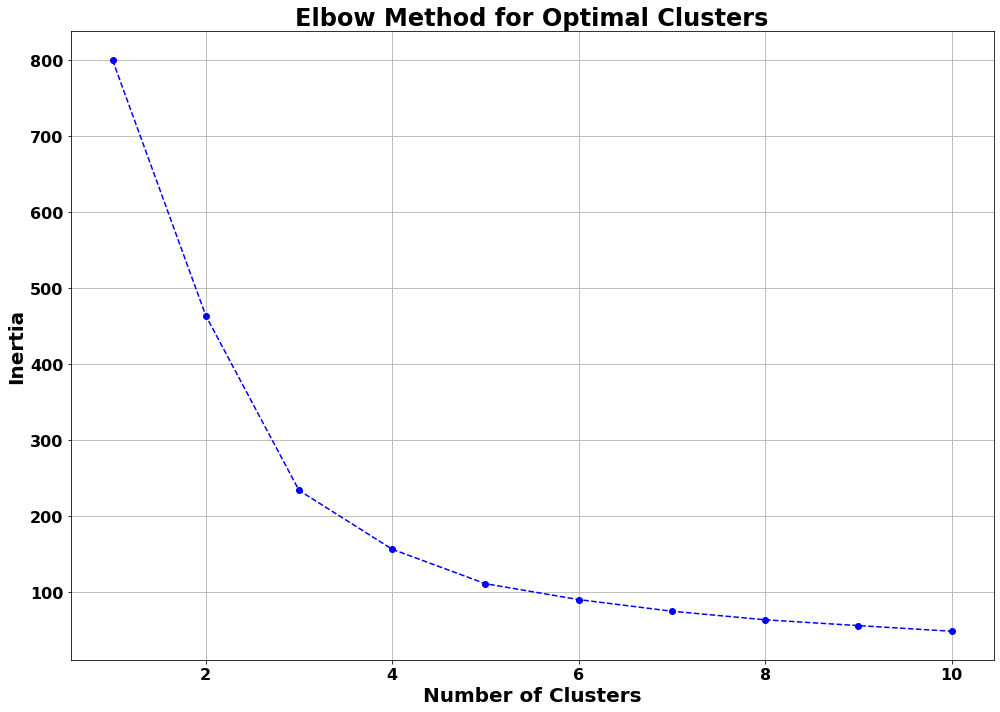

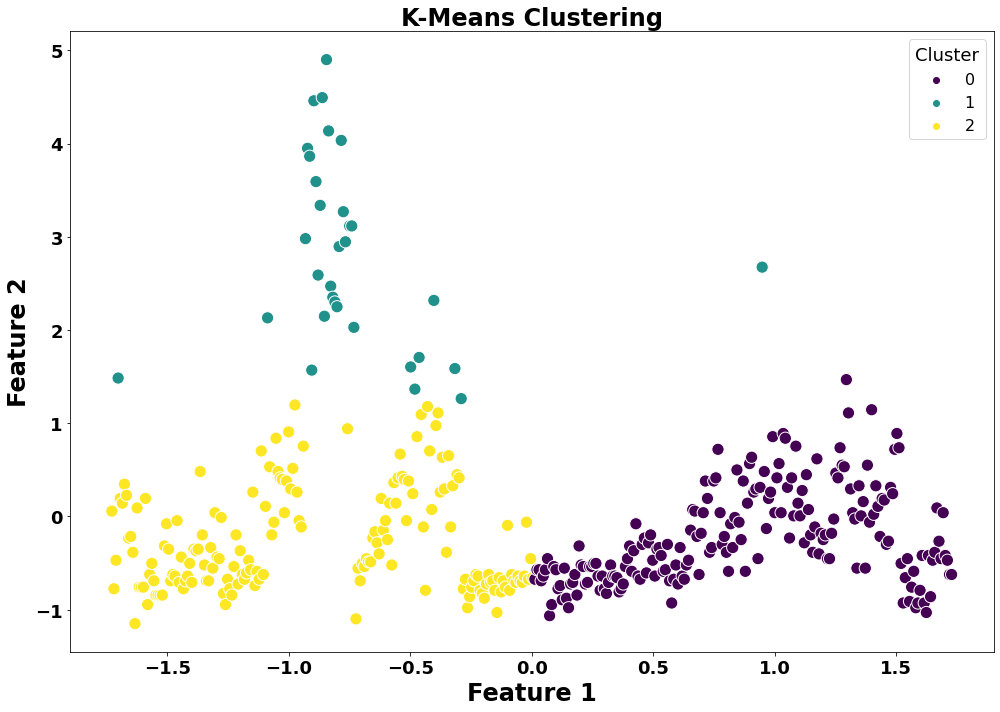

In [12]:
def main():
    Visualisation_Of_Clustering_KMeans(df)

if __name__ == "__main__":
        main()

In [13]:
# Line Fitting #

def Line_Fitting_Plot(df):
    X = df[['Code']].select_dtypes(include='number')
    y = df['Symptoms'].dropna().apply(len)

    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    plt.figure(figsize=(14, 10))
    sns.scatterplot(x=X['Code'], y=y, color='blue', label='Data', s=150)
    plt.plot(X['Code'], y_pred, color='red', label='Fitted Line', linewidth=3)
    plt.title('Line Fitting: Code vs Symptoms Length', fontsize=24, weight='bold')
    plt.xlabel('Code', fontsize=24, weight='bold')
    plt.ylabel('Symptoms Length', fontsize=24, weight='bold')
    plt.xticks(fontsize=16, weight='bold', color="blue")
    plt.yticks(fontsize=16, weight='bold', color='blue')
    plt.legend(fontsize=16)
    plt.tight_layout()
    plt.savefig('line_fit.png')
    plt.show()

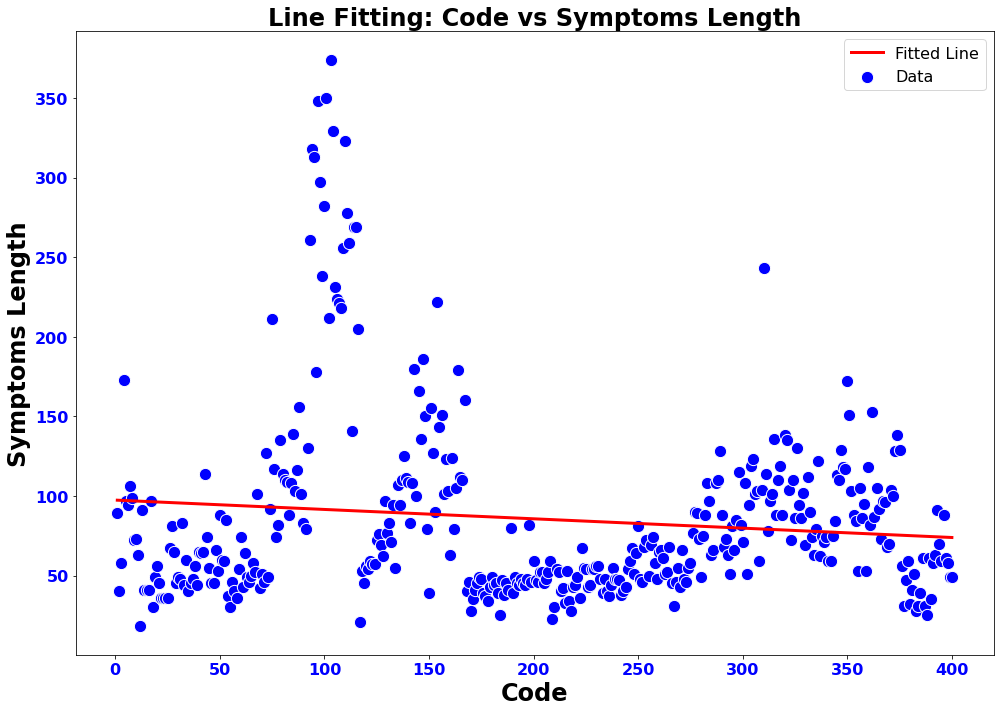

In [14]:
def main():
    Line_Fitting_Plot(df)

if __name__ == "__main__":
        main()

In [15]:
# Confusion Matrix #

def Confusion_Matrix_Plot(df):
    y_true = [0, 1, 2, 0, 1, 2]  # Example true labels
    y_pred = [0, 0, 2, 0, 2, 1]  # Example predicted labels
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1', 'Class 2'])

    plt.figure(figsize=(14, 10))
    disp.plot(cmap='viridis', ax=plt.gca(), colorbar=False)
    plt.title('Confusion Matrix', fontsize=24, weight='bold')
    plt.xticks(fontsize=18, weight='bold')
    plt.yticks(fontsize=18, weight='bold')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()

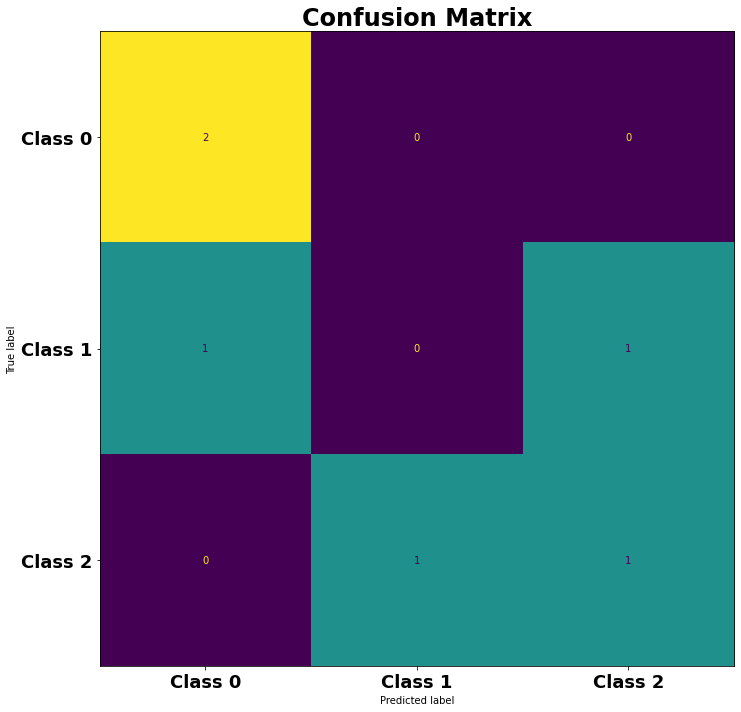

In [16]:
def main():
    Confusion_Matrix_Plot(df)

if __name__ == "__main__":
        main()

In [17]:
# Violin Plot #

def Violin_Plot(df):
    plt.figure(figsize=(14, 10))
    sns.violinplot(data=df.select_dtypes(include='number'), palette='viridis', scale='count')
    plt.title('Violin Plot of Numerical Features', fontsize=24, weight='bold')
    plt.xlabel('Features', fontsize=20, weight='bold')
    plt.ylabel('Density', fontsize=20, weight='bold')
    plt.xticks(fontsize=16, weight='bold', rotation=45)
    plt.yticks(fontsize=16, weight='bold')
    plt.tight_layout()
    plt.savefig('violin_plot.png')
    plt.show()

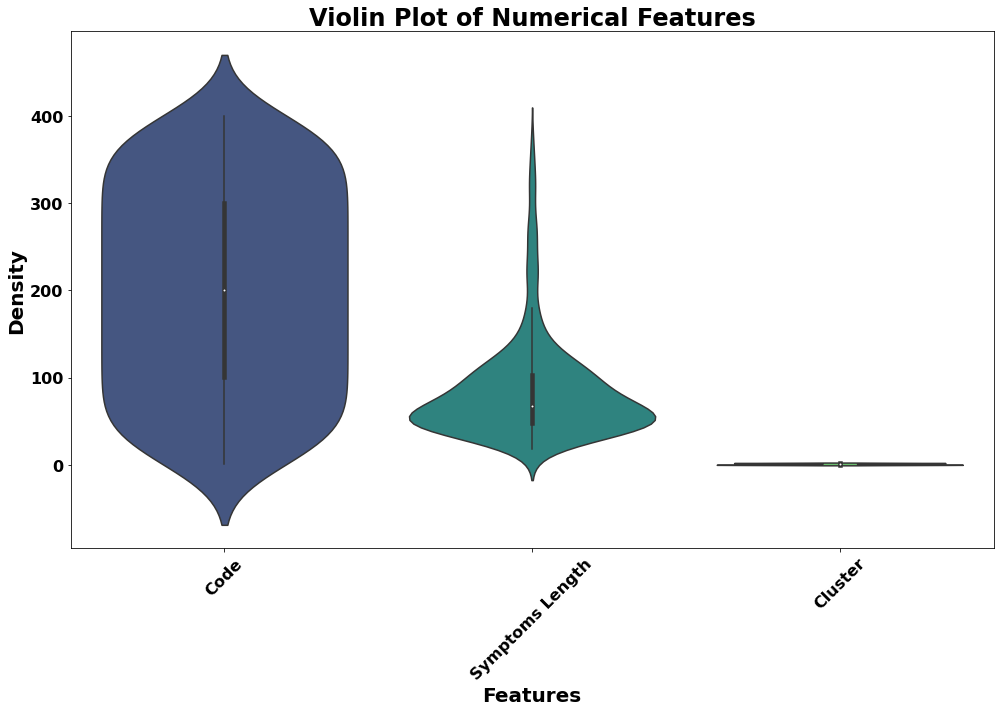

In [18]:
def main():
    Violin_Plot(df)

if __name__ == "__main__":
        main()